In [23]:
from IPython.display import YouTubeVideo
from IPython.display import Video
from ipywidgets import interact
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import scipy.stats as stats
from scipy.io import wavfile
import scipy.io.wavfile



In [2]:
def heatmap(data, labels, ax, colormap="Wistia", c="b", title=""):   
    im = ax.imshow(data, cmap=colormap)
    n = len(labels)
    ax.set_xticks(np.arange(n))
    ax.set_yticks(np.arange(n))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    for i in range(n):
        for j in range(n):
            text = ax.text(j, i, data[i, j], ha="center", va="center", color=c, size='x-large')
        
    if title != "":
        ax.set_title(title)

def confusion_matrix(thresh = 160):
    mu1 = 130
    mu2= 200
    sigma = 20
    xs = [np.linspace(m-3.5*sigma, m+3.5*sigma, 100) for m in [mu1, mu2]]
    fig, axs= plt.subplots(1, 2, figsize=(15,5))

    for x, m in zip(xs,[mu1, mu2]):
        y = stats.norm.pdf(x, m, sigma)
        axs[0].plot(x, y)
        axs[0].fill_between(x, y, alpha=0.5)
    axs[0].axvline(x=thresh, c='k')
    
    positive = np.random.normal(mu2, sigma, 50)
    negative = np.random.normal(mu1, sigma, 50)
    
    mat = np.zeros((2,2), dtype=np.long)
    mat[0,0] = sum(positive >= thresh)
    mat[0,1] = sum(negative >= thresh)
    mat[1,0] = sum(positive < thresh)
    mat[1,1] = sum(negative < thresh)
    accuracy = (mat[0,0] + mat[1,1])/np.sum(mat)
    
    heatmap(mat, ['positive', 'negative'], axs[1], colormap="YlGn", c="r", title="accuracy: "+str(accuracy))

# Sygnały III

## Percepcja dźwięku

### Efekt McGurka

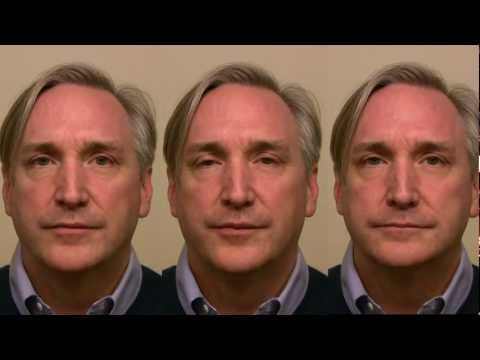

In [3]:
YouTubeVideo('PWGeUztTkRA', width=800, height=500)

[https://www.illusionsindex.org/i/mcgurk-effect](https://www.illusionsindex.org/i/mcgurk-effect)

### Percepcja częstotliwości

![Ślimak](https://www.ncbi.nlm.nih.gov/books/NBK10946/bin/ch13f5.jpg)

[https://www.ncbi.nlm.nih.gov/books/NBK10946/](https://www.ncbi.nlm.nih.gov/books/NBK10946/)

In [4]:
Video('http://www.auditoryneuroscience.com/sites/default/files/BMtocataAndFugue.mp4')

[http://www.auditoryneuroscience.com/ear/bm4_tocata_fugue](http://www.auditoryneuroscience.com/ear/bm4_tocata_fugue)

### Barwa dźwięku

![harmoniczne](https://upload.wikimedia.org/wikipedia/commons/b/b7/Harmonic_spectra_theoretical_x_y.png)

[https://en.wikipedia.org/wiki/Timbre](https://en.wikipedia.org/wiki/Timbre)

## Wytwarzanie mowy

![artykulacja](https://athena.ecs.csus.edu/~changw/Sounds/SpeechSynth/pics/anatomy.png)

[https://athena.ecs.csus.edu/~changw/Sounds/SpeechSynth/acoustics.html](https://athena.ecs.csus.edu/~changw/Sounds/SpeechSynth/acoustics.html)

![ton krtaniowy](https://newt.phys.unsw.edu.au/jw/graphics/sourcefilter.GIF)

[https://newt.phys.unsw.edu.au/jw/speechmodel.html](https://newt.phys.unsw.edu.au/jw/speechmodel.html)

### Częstotliwość podstawowa tonu krtaniowego w mowie

- Mężczyzni 85-180Hz
- Kobiety 165-255Hz
- Dzieci  250-300Hz

## Przykladowe metody detekcji częstotliwości podstawowej

### Harmonic Product Spectrum

![hps](https://ccrma.stanford.edu/~pdelac/154/m154paper_files/image018.gif)

[https://ccrma.stanford.edu/~pdelac/154/m154paper.htm](https://ccrma.stanford.edu/~pdelac/154/m154paper.htm)

### Analiza cepstralna

![cepstrum](http://vlab.amrita.edu/userfiles/7/image/speech/ex5/experiment6-theory-fig1.jpg)

[http://vlab.amrita.edu/?sub=3&brch=164&sim=615&cnt=1](http://vlab.amrita.edu/?sub=3&brch=164&sim=615&cnt=1)

## Funkcja okna

![leakage](https://www.cs.put.poznan.pl/amensfelt/pub/leakage.png)

## Macierz pomyłek

In [5]:
interact(confusion_matrix, thresh=(120,200,1))

interactive(children=(IntSlider(value=160, description='thresh', max=200, min=120), Output()), _dom_classes=('…

<function __main__.confusion_matrix(thresh=160)>

2


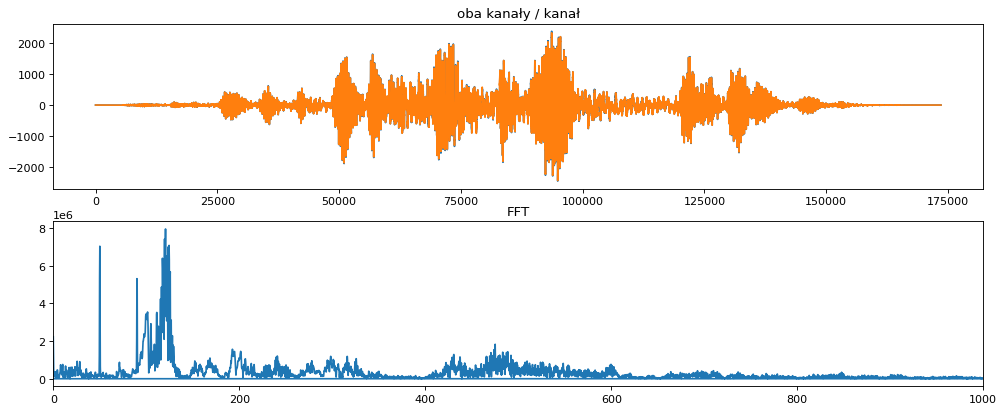

In [190]:
from scipy import signal as sg

w, signal = scipy.io.wavfile.read('train/017_M.wav')

window = sg.windows.blackman(len(signal)) #mozna sprawdzac dla roznych okien (blackmanharris, bohman i inne)
print(signal.ndim)

if signal.ndim == 1:
    #sygnal jest jednokanalowy
    signal = np.array(signal) * window
    fouriered = abs(fft.fft(signal))
else:
    #sygnal jest dwukanalowy - licze FFT ze sredniej lewego i prawego kanalu.
    signal = np.array(signal) * np.array([[i, i] for i in window])
    signal_l = np.array([i[0] for i in signal])
    signal_r = np.array([i[1] for i in signal])
    fouriered = abs(fft.fft( (signal_l + signal_r ) / 2))
    


fig = plt.figure(figsize=(15, 6), dpi=80)  

ax = fig.add_subplot(211)
ax.set_title('oba kanały / kanał')
ax.plot(signal)

#OX
freqs = fft.fftfreq(len(signal), 1/w)

ax = fig.add_subplot(212)
ax.set_title('FFT')
ax.set_xlim([0.0, 1000])
ax.plot(freqs, fouriered)


[0.00000000e+00 1.90234623e-01 3.80469245e-01 ... 4.12059607e+04
 4.12061509e+04 4.12063412e+04]


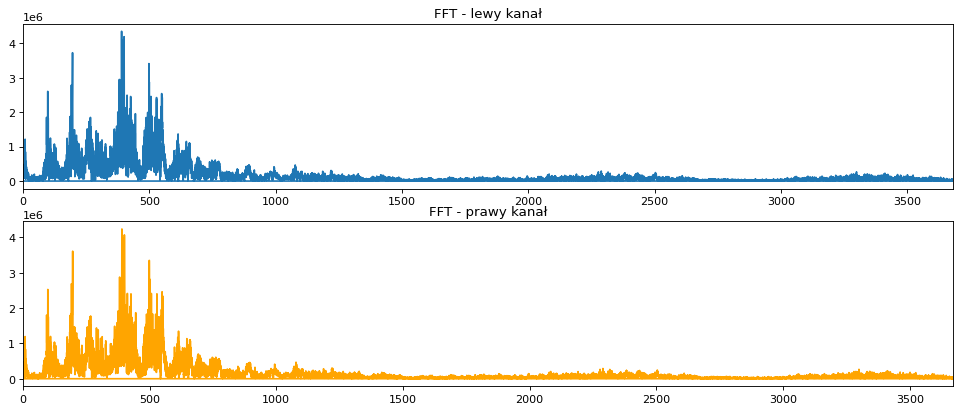

In [136]:
from numpy import *

#--- Wykonujemy FFT
fouriered_l = fft.fft(signal_l)
fouriered_l = abs(fouriered_l) # moduł

fig = plt.figure(figsize=(15, 6), dpi=80)  

ax = fig.add_subplot(211)
ax.set_title('FFT - lewy kanał')
ax.set_xlim([0.0, max(signal_l)])

ax.plot(fft.fftfreq(len(signal_l), 1/w), fouriered_l)


fouriered_r = fft.fft(signal_r)
fouriered_r = abs(fouriered_r) # moduł

ax = fig.add_subplot(212)
ax.set_title('FFT - prawy kanał')
ax.set_xlim([0.0, max(signal_r)])

ax.plot(fft.fftfreq(len(signal_r), 1/w), fouriered_r, color = 'orange')

k = arange(len(signal_l))
T = len(data) / w  # where fs is the sampling frequency
frqLabel = k / T
print(frqLabel)

